In [3]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display
from collections import Counter
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
%matplotlib inline

In [17]:
%run Classes_many.ipynb
%run Functions_many.ipynb
%run Options_many.ipynb

In [18]:
display_bar_plot(display_bar=display_bar,initial=True)

start_time = time.time()

gen_zero = random_gen(n_gen,all_selfish=initial_all_selfish,n_turns=n_turns,selection_classes=selection_classes)

reset(gen_zero)

if all_vs_all:
    for i in range(len(gen_zero)-1):
        display_bar_plot(display_bar=display_bar,later=True,step=step,n_gen=n_gen)
        for j in range(i+1,len(gen_zero)):
            if i==j:
                break
            challenge_with_det(gen_zero[i],gen_zero[j],n_turns)     
            
if one_vs_one:
    if n_gen%2!=0:
        print("Error: n_gen must be even if you want to play one versus one. \n", \
                "The last element of the generation has been removed")
        gen_zero = gen_zero[:-1]
    opponents = np.random.choice(len(gen_zero),(int(n_gen/2),2),replace=False)
    for couple in opponents:
        challenge_with_det(gen_zero[couple[0]],gen_zero[couple[1]],n_turns)
        
if n_vs_n:
    if n_gen%n_per_group!=0:
        print("Error: n_gen must be even if you want to play one versus one. \n", \
                "The last %i element/s of the generation has/have been removed" %(n_gen%n_per_group))
        gen_zero = gen_zero[0:-int(n_gen%n_per_group)]
    opponents = np.random.choice(len(gen_zero),(int(n_gen/n_per_group),n_per_group),replace=False)
    for group in opponents:
        for i in range(n_per_group-1):
            for j in range(i+1,n_per_group):
                challenge_with_det(gen_zero[group[i]],gen_zero[group[j]],n_turns)
                
if all_vs_n:
    challengers = np.random.choice(len(gen_zero),n_challengers,replace=False)
    challengers = [gen_zero[i] for i in challengers]
    for pris1 in gen_zero:
        for pris2 in challengers:
            challenge_with_det_avn(pris1,pris2,n_turns)

display_bar_plot(display_bar=display_bar,close=True)      

finish_time = time.time()
print('Total time elapsed: ', finish_time-start_time)

Error: n_gen must be even if you want to play one versus one. 
 The last 10 element/s of the generation has/have been removed
Total time elapsed:  4.795780897140503


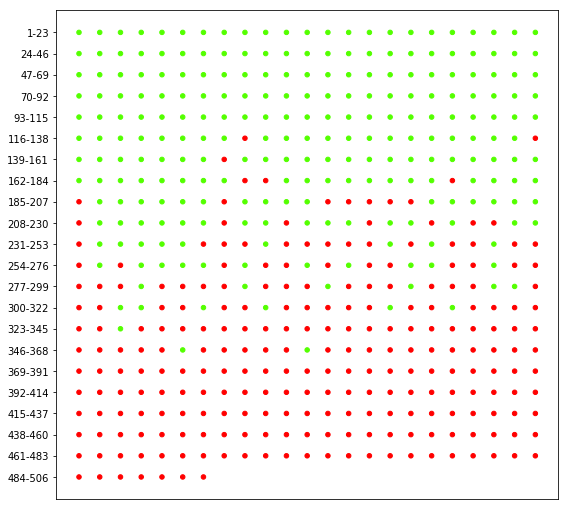

In [19]:
_ = evolve(gen_zero,offset=0,power=10,show=True,n_rounds=n_turns,selection_classes=selection_classes)

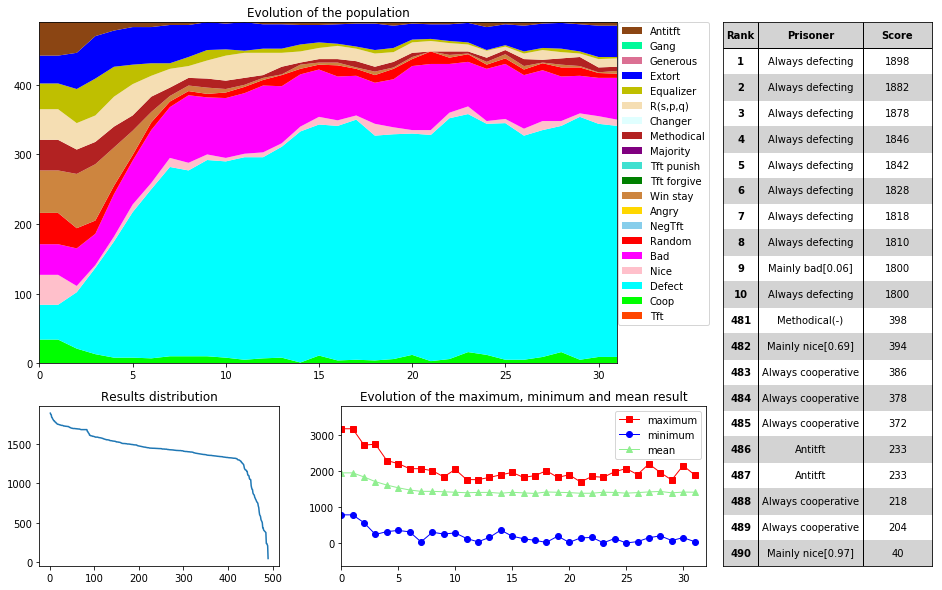

In [20]:
density_pop,maxima,minima,mean,fig = start_4_plot(gen_zero)

new_gen = evolve(gen_zero,offset=offset,power=power,show=False,controlled_mutation=controlled_mutation,
                 random_mutation=random_mutation,prob_gang=prob_gang,prob_antitft=prob_antitft,n_rounds=n_turns,
                 selection_classes=selection_classes)

for i in range(1,n_epoch+1):
    if all_vs_all:
        evaluate_gen_all_vs_all(new_gen,display_bar=False,n_turns=n_turns)
    if one_vs_one:
        evaluate_gen_one_vs_one(new_gen,n_turns)
    if n_vs_n:
        evaluate_gen_n_vs_n(new_gen,n_turns,n_per_group)
    if all_vs_n:
        evaluate_gen_all_vs_n(new_gen,n_turns,n_challengers)
    density_pop,maxima,minima,mean = update_4_plot(new_gen,density_pop,year=i-1,end=n_epoch-1,
                                                   fig=fig,maxima=maxima,minima=minima,mean=mean)
    new_gen = evolve(new_gen,show=False,offset=offset,power=power,controlled_mutation=controlled_mutation,
                     random_mutation=random_mutation,prob_gang=prob_gang,prob_antitft=prob_antitft,
                     n_rounds=n_turns,selection_classes=selection_classes)